# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


In [1]:
##run this cell to use the notebook

##it imports the modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import scipy.stats as ss
from scipy.stats import norm
from scipy.optimize import curve_fit
import numpy as np
import math
from math import pi


#and defines important methods

def f2plot(file,cat,pts):
    #this function takes a file and turns it into a
    #given matrix for plotting reasons
    table=np.zeros([cat,pts])
    lines=file.readlines()
    c=0
    for line in lines:
        line = line.replace("\n","")
        data = line.split(' ')
        for i in range(len(data)):
            table[i][c] = float(data[i])
        c += 1
    file.close()
    return table

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

## Eye candy

Let's start with the end


In [2]:
from mpl_toolkits.mplot3d import Axes3D

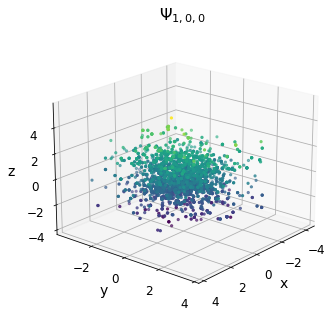

In [3]:
M=5000
f=open("xyz_100.out","r")
data=f2plot(f,3,5000)
X=data[0]
Y=data[1]
Z=data[2]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20, 40)
plt.title('$\Psi_{1,0,0}$')
plt.show()

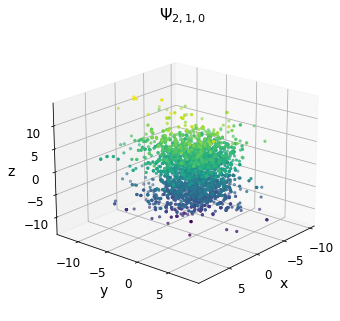

In [4]:
M=5000
f=open("xyz_210.out","r")
data=f2plot(f,3,5000)
X=data[0]
Y=data[1]
Z=data[2]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X,Y,Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20, 40)
plt.title('$\Psi_{2,1,0}$')
plt.show()

Not convinced yet? Enjoy the nodal plane of $\Psi_{2,1,0}$

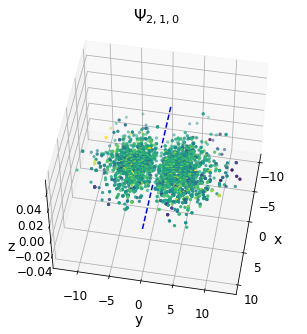

In [60]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X,Z, c=Y, marker='.')
t = np.linspace(-10, -3, 100)

u = np.zeros(100)
v = -t
ax.plot3D(v, u, u, linestyle='dashed',color='blue')
ax.plot3D(t, u, u, linestyle='dashed',color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 10)
plt.title('$\Psi_{2,1,0}$')
plt.show()

## Uniform transition function

We start from a far-away point, say r=50. We start adjusting the cartesian step of the uniform transition function, and plot the acceptance rate after 5 $\times 10^4$ throws,as a function of the step length. (By step we mean the range over which each coordinate change)

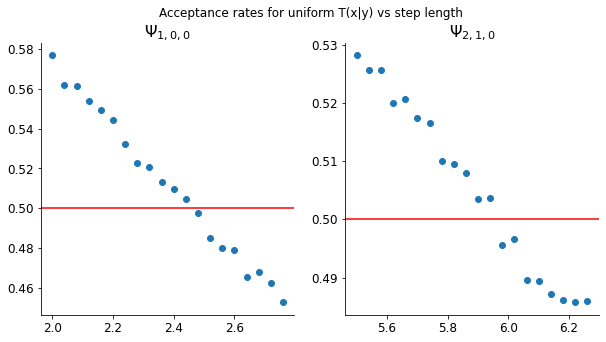

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Acceptance rates for uniform T(x|y) vs step length')
f=open("step_acc_psi1.out","r")
data=f2plot(f,2,20)
ax[0].scatter(data[0],data[1])
ax[0].set_title('$\Psi_{1,0,0}$')
ax[0].axhline(y = .5, color = 'r', linestyle = '-')

f=open("step_acc_psi2.out","r")
data=f2plot(f,2,20)
ax[1].scatter(data[0],data[1])
ax[1].set_title('$\Psi_{2,1,0}$')
ax[1].axhline(y = 0.5, color = 'r', linestyle = '-')
plt.show()

We therefore point as following:
 - Optimal step length for $\Psi_{1,0,0}$ turns out to be around 2.5;
 - Optimal step length for $\Psi_{2,1,0}$ turns out to be around 6.

We'd like to equilibrate our algorithm before we measure the radius. That is, we'd like to eliminate the effects of the starting point on our estimations! To do so, we observe how the difference between the instantanous value of r and the average value of r over a long time (which should be equal to the expectation value!). 

We see how many equilibration steps we need starting far away from the origin,say $\vec{r_i} = (150,0,0)$

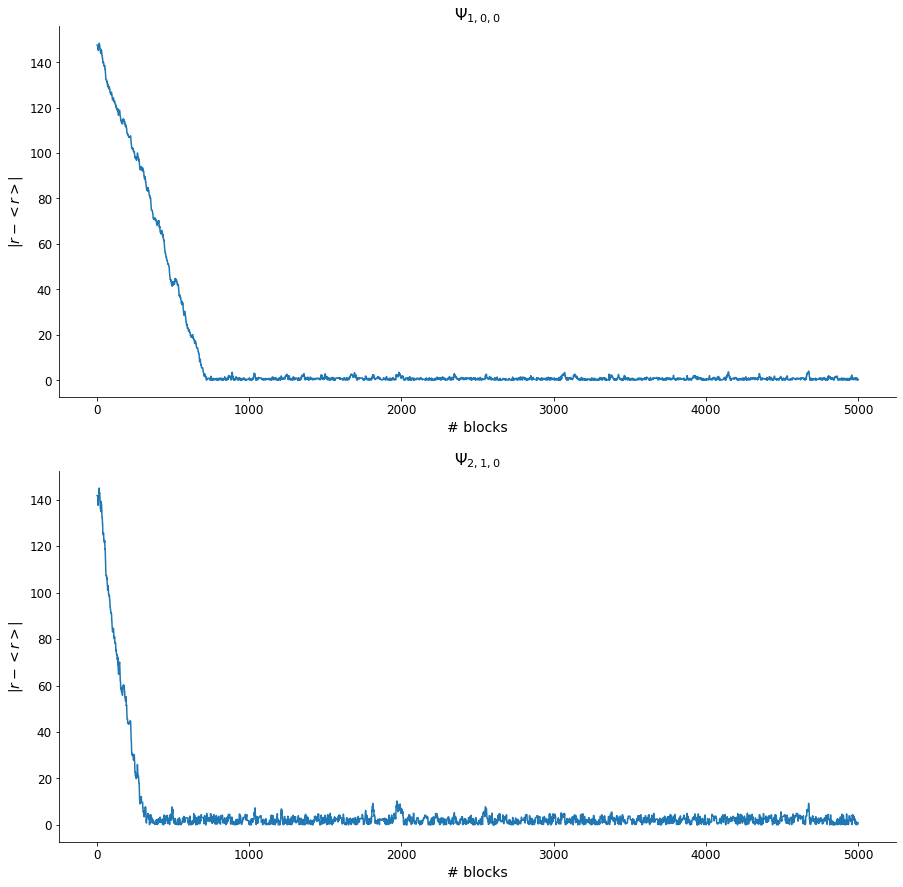

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(15,15))

f=open("eq_100.out","r")
data=f2plot(f,4,5000)
ax[0].plot(data[0],abs(data[2]-1.5))
ax[0].set_title('$\Psi_{1,0,0}$')
ax[0].set_ylabel('$|r-<r>|$')
ax[0].set_xlabel('# blocks')

f=open("eq_210.out","r")
data=f2plot(f,4,5000)
ax[1].plot(data[0],abs(data[2]-6))
ax[1].set_title('$\Psi_{2,1,0}$')
ax[1].set_ylabel('$|r-<r>|$')
ax[1].set_xlabel('# blocks')

plt.show()

We note that, starting far from the origin, we have a distinct trend towards the origin. This in accordance with the exponential dependence on radius of the orbitals' wavefunctions. Starting from $(150,0,0)$, required equilibration times are:
 - $\sim 750$ steps for $\Psi_{1,0,0}$ ;
 - $\sim 500$ steps for $\Psi_{2,1,0}$

We now use our sampled trajectory to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$.
We start far from the origin, say $\vec{r_i} = (150,0,0)$, go through some equilibration steps and then start measuring the radius.

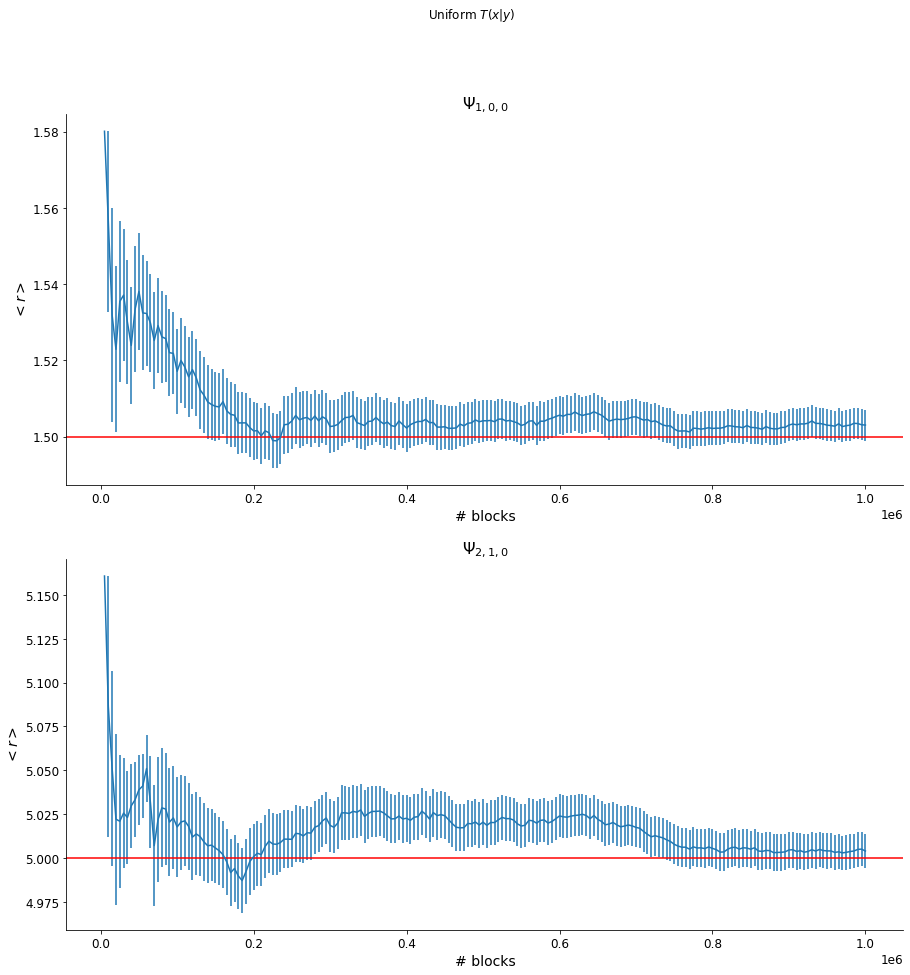

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(15,15))

fig.suptitle('Uniform $T(x|y)$')
f=open("r_100.out","r")
data=f2plot(f,4,200)
ax[0].errorbar(data[0]*5000,data[1],yerr=data[3])
ax[0].set_title('$\Psi_{1,0,0}$')
ax[0].set_ylabel('$<r>$')
ax[0].set_xlabel('# blocks')
ax[0].axhline(y = 1.5, color = 'r', linestyle = '-')
f=open("r_210.out","r")
data=f2plot(f,4,200)
ax[1].errorbar(data[0]*5000,data[1],yerr=data[3])
ax[1].set_title('$\Psi_{2,1,0}$')
ax[1].set_ylabel('$<r>$')
ax[1].set_xlabel('# blocks')
ax[1].axhline(y = 5., color = 'r', linestyle = '-')

plt.show()

## Gaussian transition function


We now switch to a gaussian multivariate probability function for our $T(x|y)$, and see how our results change.
We find an adequate variance such that we accept half of the moves.

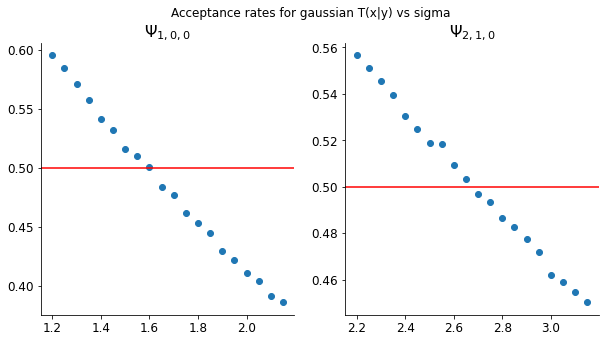

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Acceptance rates for gaussian T(x|y) vs sigma')
f=open("var_acc_100.out","r")
data=f2plot(f,2,20)
ax[0].scatter(data[0],data[1])
ax[0].set_title('$\Psi_{1,0,0}$')
ax[0].axhline(y = .5, color = 'r', linestyle = '-')

f=open("var_acc_210.out","r")
data=f2plot(f,2,20)
ax[1].scatter(data[0],data[1])
ax[1].set_title('$\Psi_{2,1,0}$')
ax[1].axhline(y = 0.5, color = 'r', linestyle = '-')
plt.show()

We therefore point as following:
 - Optimal $\sigma$ for $\Psi_{1,0,0}$ turns out to be around 1.5;
 - Optimal $\sigma$ for $\Psi_{2,1,0}$ turns out to be around 2.7.

We now wish to observe the time needed for euqilibration starting from $\vec{r} = (150,0,0)$

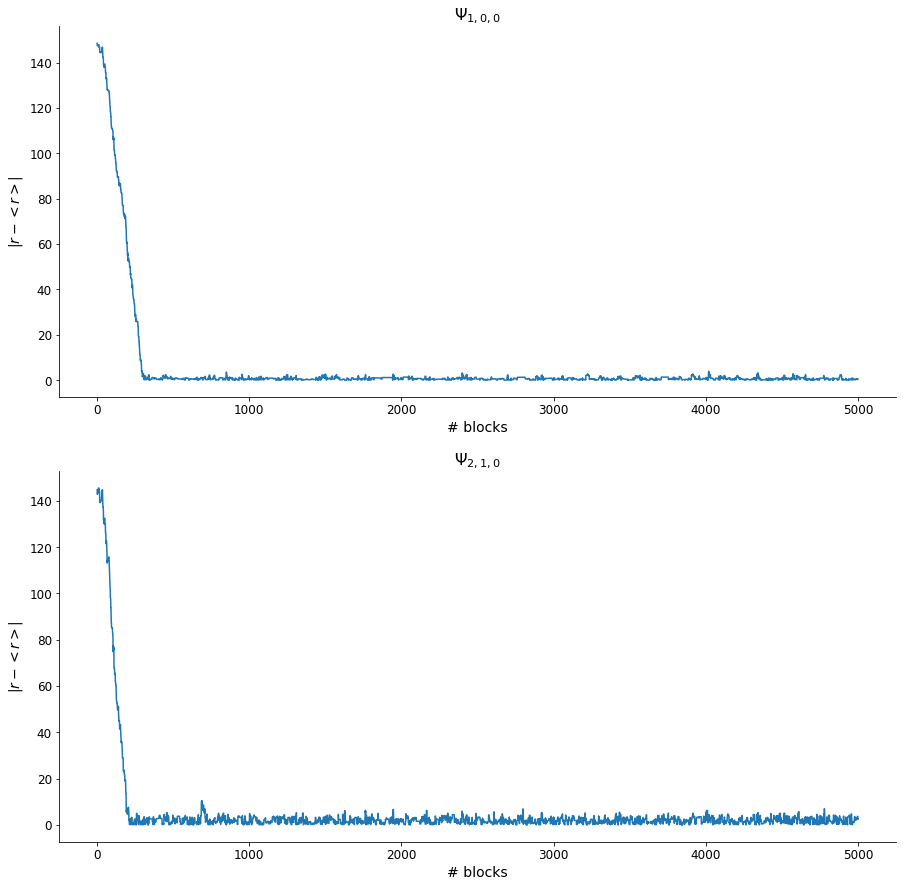

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(15,15))

f=open("eq_100g.out","r")
data=f2plot(f,4,5000)
ax[0].plot(data[0],abs(data[2]-1.5))
ax[0].set_title('$\Psi_{1,0,0}$')
ax[0].set_ylabel('$|r-<r>|$')
ax[0].set_xlabel('# blocks')

f=open("eq_210g.out","r")
data=f2plot(f,4,5000)
ax[1].plot(data[0],abs(data[2]-6))
ax[1].set_title('$\Psi_{2,1,0}$')
ax[1].set_ylabel('$|r-<r>|$')
ax[1].set_xlabel('# blocks')

plt.show()

We obtain plots that closely resemble those from a uniform distribution.Starting from $(150,0,0)$, required equilibration times are:
 - $\sim 400$ steps for $\Psi_{1,0,0}$ ;
 - $\sim 300$ steps for $\Psi_{2,1,0}$
 
There seems to be a faster equilibration using gaussian transition function


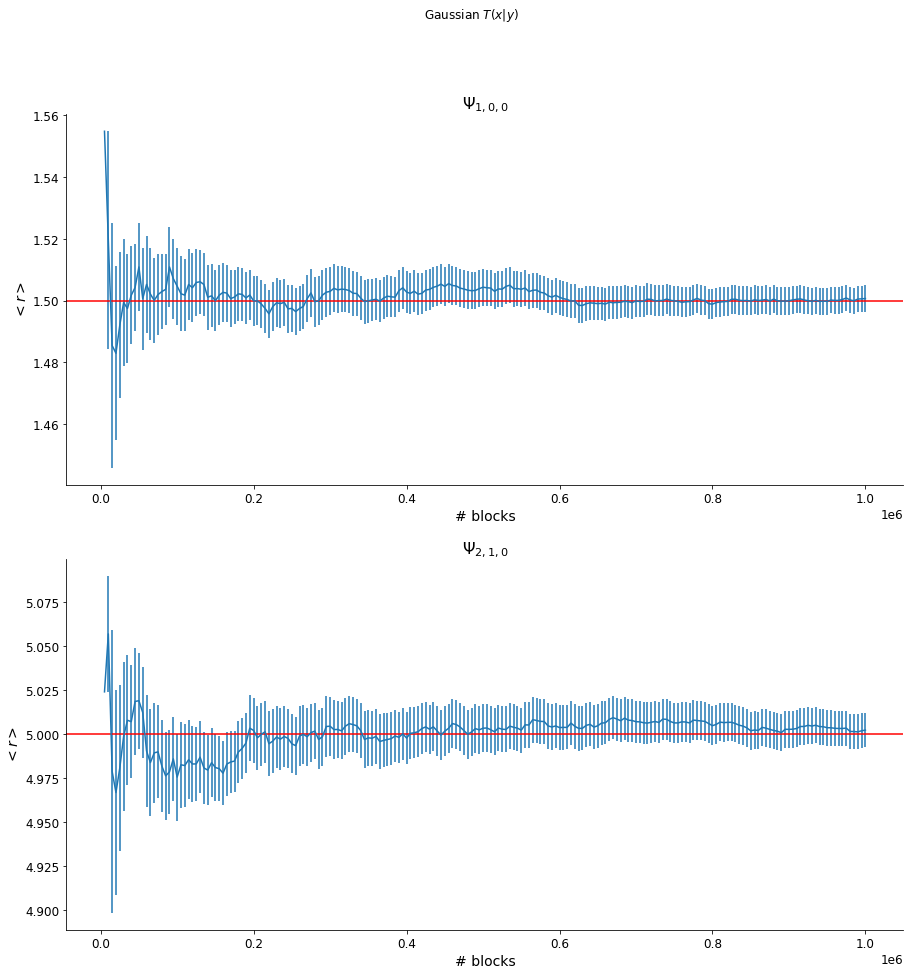

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(15,15))

fig.suptitle('Gaussian $T(x|y)$')
f=open("r_100g.out","r")
data=f2plot(f,4,200)
ax[0].errorbar(data[0]*5000,data[1],yerr=data[3])
ax[0].set_title('$\Psi_{1,0,0}$')
ax[0].set_ylabel('$<r>$')
ax[0].set_xlabel('# blocks')
ax[0].axhline(y = 1.5, color = 'r', linestyle = '-')
f=open("r_210g.out","r")
data=f2plot(f,4,200)
ax[1].errorbar(data[0]*5000,data[1],yerr=data[3])
ax[1].set_title('$\Psi_{2,1,0}$')
ax[1].set_ylabel('$<r>$')
ax[1].set_xlabel('# blocks')
ax[1].axhline(y = 5., color = 'r', linestyle = '-')

plt.show()

## Comparison

Results derived using a gaussian and an uniform $T$ seem to be similar. We might plot them together to be extra-sure:

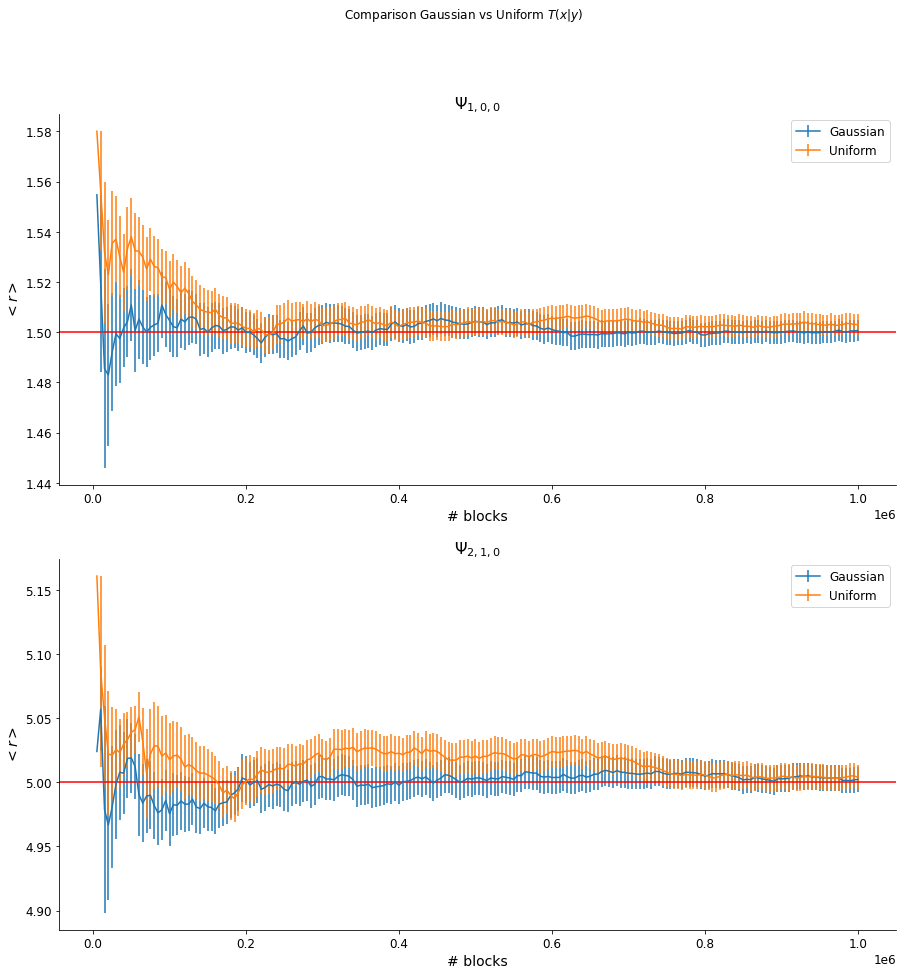

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(15,15))

fig.suptitle('Comparison Gaussian vs Uniform $T(x|y)$')
f=open("r_100g.out","r")
data=f2plot(f,4,200)
ax[0].errorbar(data[0]*5000,data[1],yerr=data[3],label='Gaussian')
ax[0].set_title('$\Psi_{1,0,0}$')
ax[0].set_ylabel('$<r>$')
ax[0].set_xlabel('# blocks')
f=open("r_100.out","r")
data=f2plot(f,4,200)
ax[0].errorbar(data[0]*5000,data[1],yerr=data[3],label='Uniform')
ax[0].axhline(y = 1.5, color = 'r', linestyle = '-')
ax[0].legend()
f=open("r_210g.out","r")
data=f2plot(f,4,200)
ax[1].errorbar(data[0]*5000,data[1],yerr=data[3],label='Gaussian')
ax[1].set_title('$\Psi_{2,1,0}$')
ax[1].set_ylabel('$<r>$')
ax[1].set_xlabel('# blocks')
ax[1].axhline(y = 5., color = 'r', linestyle = '-')
f=open("r_210.out","r")
data=f2plot(f,4,200)
ax[1].errorbar(data[0]*5000,data[1],yerr=data[3],label='Uniform')
ax[1].legend()

plt.show()

Over the long run, the results are very similar. In the beginning, however, a gaussian $T$ seems to help the algorithm converge faster.

## Data blocking

Being a Markov chain, the trajectory we sample will inevitably suffer from autocorrelation of close points.
To solve this, we perform data blocking. We observe that, using small blocks, we will underestimate, in the block, the uncertainty of the distribution (of radii).

We observe that the uncertainty inside a block will grow with the size of the blocks, and remain underestimated until we reach a certain block size. It is observed that, surpassing $\sim 50$ steps per block, the uncertainties become constants. To be sure we might take bigger blocks. In this notebook blocks 5000 steps long are used to make data more understandable on the plots.